In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import svm
import sklearn
from sklearn.metrics import classification_report
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils
from keras.models import Sequential
from keras.layers import GRU, Dense, Activation, ReLU, Dropout, Flatten
from keras.initializers import Constant
from keras.layers.embeddings import Embedding
from keras import optimizers
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

,date,retweets,favorites,text,geo,id,clean_text,Words,Hashtags1,Hashtags2
0,12/21/2015 18:55,0,5,A Very Hadoopy Christmas http:// hortonworks.c...,NaN,6.790000e+17,A Very Hadoopy Christmas http hortonworkscombl...,"a', 'very', 'hadoopy', 'christmas', 'http', 'h...",#,#datascience
1,12/21/2015 18:51,1,2,You keep the good customers. You fire the bad ...,NaN,6.790000e+17,You keep the good customers You fire the bad c...,"you', 'keep', 'the', 'good', 'customers', 'you...",#CLV,#acquisitions
2,12/21/2015 18:48,0,1,Improving OS Fingerprinting via Machine Learni...,NaN,6.790000e+17,Improving OS Fingerprinting via Machine Learni...,"improving', 'os', 'fingerprinting', 'via', 'ma...",#InfoSec,#datascience
3,12/21/2015 18:47,0,0,ManuelGCubedo: RT bigdataconf: #DataScience Tr...,NaN,6.790000e+17,ManuelGCubedo RT bigdataconf DataScience Train...,"manuelgcubedo', 'rt', 'bigdataconf', 'datascie...",#DataScience,#predictive
4,12/21/2015 18:45,0,0,Thanks AAASFellowships KatSongPR for the menti...,NaN,6.790000e+17,Thanks AAASFellowships KatSongPR for the menti...,"thanks', 'aaasfellowships', 'katsongpr', 'for'...",#BDHubs,#WBDIH
5,12/21/2015 18:45,0,0,RT IE_BigData: How airlines use data insights ...,NaN,6.790000e+17,RT IEBigData How airlines use data insights to...,"rt', 'iebigdata', 'how', 'airlines', 'use', 'd...",#datascience,#BigData
6,12/21/2015 18:45,0,0,RT strataconf: .pacoid teaches you how to prep...,NaN,6.790000e+17,RT strataconf pacoid teaches you how to prepar...,"rt', 'strataconf', 'pacoid', 'teaches', 'you',...",#datascience,NaN
7,12/21/2015 18:45,3,0,RT datascience _tn: Selling #DataScience :Comm...,NaN,6.790000e+17,RT datascience tn Selling DataScience Common L...,"rt', 'datascience', 'tn', 'selling', 'datascie...",#DataScience,#bigdata
8,12/21/2015 18:45,0,0,RT Angoss: How #DataScience Is Driving The Dri...,NaN,6.790000e+17,RT Angoss How DataScience Is Driving The Drive...,"rt', 'angoss', 'how', 'datascience', 'is', 'dr...",#DataScience,NaN
9,12/21/2015 18:45,0,0,Five #DataScience Predictions for 2016 http://...,NaN,6.790000e+17,Five DataScience Predictions for http owlyWcn,"five', 'datascience', 'predictions', 'for', 'h...",#DataScience,NaN


In [300]:
df = pd.read_csv("concat_cleaned_data.csv")

df=df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Hashtags3', 'username', 'permalink', 'Unnamed: 7','mentions'])

data=df.drop_duplicates(subset="clean_text")

list1=[]
for i in data.text:
    t=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", i).split())
    t=re.sub("RT"," ",t)
    t=re.sub("[^a-zA-Z]", " ", t)
    t=re.sub(r'\d+', " ", t)
    t=re.sub("gt", " ",t)
    t=re.sub("http", " ",t)
    t=re.sub("https", " ",t)
    t=re.sub("^www.", " ",t)
    t=re.sub(".*\.com$", " ",t) 
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    t=shortword.sub('', t)
    list1.append(t)

data["clean_text"]=list1



data['Text_Length'] = data['clean_text'].str.len()



# plt.figure(figsize=(10, 5))
# plt.subplot(1, 6, 1)
# plt.tight_layout()
# data['retweets'].plot(kind='box',title="Retweets")
# # plt.show()
# plt.subplot(1, 6, 3)
# data['favorites'].plot(kind='box',title="Likes")
# #plt.show()
# plt.subplot(1, 6, 5)
# data['Text_Length'].plot(kind='box',title="Text Length")
# plt.show()

/Users/user/anaconda2/envs/twitte_pred/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/user/anaconda2/envs/twitte_pred/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/user/anaconda2/envs/twitte_pred/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [301]:
def rm_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    non_outliers = (data[column] >= Q1-(3*IQR)) & (data[column] <= Q3 + (3.5*IQR))
    outlier_reduction = data.loc[non_outliers]
    return outlier_reduction

data_retweet = pd.DataFrame()
data_after_outlier = rm_outliers(data, 'Text_Length')


# data_after_outlier['Text_Length'].plot(kind='box',title="Text Length")
# plt.show()

In [302]:
########## DATA BINNING ###########
data_after_outlier = data_after_outlier.drop_duplicates(subset="clean_text")
data_after_outlier = data_after_outlier[data_after_outlier.retweets != 0]
data_after_outlier = data_after_outlier[data_after_outlier.favorites != 0]

bins = [0,1,2,5,10000 ]
label = [1,2,3,4]

data_after_outlier['bin_class_Retweet'] = pd.cut(data_after_outlier['retweets'], bins, labels=label)
data_after_outlier['bin_class_Likes'] = pd.cut(data_after_outlier['favorites'], bins, labels=label)

# plt.figure(figsize=(10, 5))
# plt.subplot(1,3,1)
# plt.hist(data_after_outlier.bin_class_Retweet)
# plt.subplot(1,3,3)
# plt.hist(data_after_outlier.bin_class_Likes)

In [448]:
data_after_outlier = pd.read_csv("binned_data.csv")

/Users/user/anaconda2/envs/twitte_pred/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [377]:
data_after_outlier


,Unnamed: 0,date,retweets,favorites,text,geo,id,clean_text,Words,Hashtags1,Hashtags2,Text_Length,bin_class_Retweet,bin_class_Likes
0,1,12/21/2015 18:51,1,2,You keep the good customers. You fire the bad ...,NaN,6.790000e+17,keep good customers fire customers need custom...,"you', 'keep', 'the', 'good', 'customers', 'you...",#CLV,#acquisitions,75,1,2
1,15,12/21/2015 18:45,2,1,RT bobehayes: It touches everything ãThe alc...,NaN,6.790000e+17,bobehayes touches everything alchemy bigdata g...,"rt', 'bobehayes', 'it', 'touches', 'everything...",#bigdata,#datascience,79,2,1
2,20,12/21/2015 18:44,1,2,Thanks @AAASFellowships @KatSongPR for the men...,NaN,6.790000e+17,Thanks mention Moving Shaking Winter aaas news...,"thanks', 'for', 'the', 'mention', 'movingshaki...",#BDHubs,#WBDIH,175,1,2
3,56,12/21/2015 18:22,8,10,Nice interview with @KirkDBorne on #datascienc...,NaN,6.790000e+17,Nice interview with datascience bigdata analyt...,"nice', 'interview', 'with', 'on', 'datascience...",#datascience,#bigdata,76,4,4
4,58,12/21/2015 18:19,3,4,Selling #DataScience :Common Language by @Data...,NaN,6.790000e+17,Selling DataScience Common Language datacommun...,"selling', 'datascience', 'common', 'language',...",#DataScience,#bigdata,202,3,3
5,59,12/21/2015 18:18,3,1,. @KirkDBorne on #datascience and #bigdata #an...,NaN,6.790000e+17,datascience bigdata analytics data literacy ...,"on', 'datascience', 'and', 'bigdata', 'analyti...",#datascience,#bigdata,68,3,1
6,84,12/21/2015 18:11,1,4,Lets talk about data overfitting http:// dswal...,NaN,6.790000e+17,Lets talk about data overfitting dswalter gi...,"lets', 'talk', 'about', 'data', 'overfitting',...",#kaggle,#machinelearning,146,1,3
7,86,12/21/2015 18:10,1,1,Where are #technology skills heading in 2016? ...,NaN,6.790000e+17,Where technology skills heading KspV datasci...,"where', 'are', 'technology', 'skills', 'headin...",#technology,#ux,67,1,1
8,87,12/21/2015 18:10,7,8,The Simple Process To Get Real World Data Scie...,NaN,6.790000e+17,Simple Process Real World Data Science Experie...,"the', 'simple', 'process', 'to', 'get', 'real'...",#MachineLearning,#DataScience,99,4,4
9,90,12/21/2015 18:05,1,3,Top Trends for Mobile #Advertising and #DataSc...,NaN,6.790000e+17,Trends Mobile Advertising DataScience market...,"top', 'trends', 'for', 'mobile', 'advertising'...",#Advertising,#DataScience,62,1,3



# DOWNSAMPLING

Random under-sampling:
3    25743
1    24224
4    22287
2    17594
Name: bin_class_Likes, dtype: int64


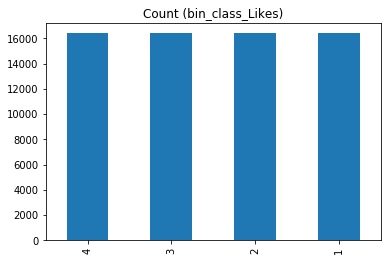

In [488]:
########## Down Sampling#########
count_class_1, count_class_2,count_class_3,count_class_4 = data_after_outlier.bin_class_Likes.value_counts()

# Divide by class
df_class_1 = data_after_outlier[data_after_outlier['bin_class_Likes'] == 1]
df_class_2 = data_after_outlier[data_after_outlier['bin_class_Likes'] == 2]
df_class_3 = data_after_outlier[data_after_outlier['bin_class_Likes'] == 3]
df_class_4 = data_after_outlier[data_after_outlier['bin_class_Likes'] == 4]

df_class_1_under = df_class_1.sample(count_class_4,replace = True)
df_class_2_under = df_class_2.sample(count_class_4,replace = True)
df_class_3_under = df_class_3.sample(count_class_4,replace = True)
df_class_4_under = df_class_4.sample(count_class_4,replace = True)
df_test_under_Likes = pd.concat([df_class_1_under, df_class_2_under,df_class_3_under,df_class_4_under], axis=0)

print('Random under-sampling:')
print(df_test_under.bin_class_Likes.value_counts())

df_test_under_Likes.bin_class_Likes.value_counts().plot(kind='bar', title='Count (bin_class_Likes)')

In [495]:
#####One Hot Encoding#########
a = df_test_under_Likes.bin_class_Likes.values
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)

In [497]:
len(b)

65568

In [498]:
############### SPLITTING NEURAL NET DATA ###############
X_train, X_test, y_train, y_test = train_test_split(df_test_under_Likes.clean_text, b, test_size=0.30, random_state=42)

In [503]:
X_train, X_test, y_train, y_test = train_test_split(df_test_under_Likes.clean_text, df_test_under_Likes.bin_class_Likes, test_size=0.30, random_state=42)


In [504]:
############### Doc2Word ###############
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
#         print (t)
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
#print((X_train))  
all_x = pd.concat([X_train,X_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec( dm=0, size=128, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs
  
X_train = get_vectors(model_ug_dbow, X_train, 128)
X_test = get_vectors(model_ug_dbow, X_test, 128)

/Users/user/anaconda2/envs/twitte_pred/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  import sys
100%|██████████| 65568/65568 [00:00<00:00, 2366143.48it/s]


# UPSAMPLING

In [309]:
# tokenizer=Tokenizer()
# tokenizer.fit_on_texts(data_after_outlier.clean_text.values)

# max_len=max([len(s.split())for s in data_after_outlier.clean_text.values])

# # converting words in numeric seq
# seq=tokenizer.texts_to_sequences(data_after_outlier.clean_text.values)

# # dictionary of words and its token
# word_index=tokenizer.word_index

# # padded sentences
# seq_pad=pad_sequences(seq, maxlen=max_len)

# ############# upsampling#########
# sm = SMOTE(random_state=2)
# X_SMOTE, y_SMOTE = sm.fit_sample(seq_pad, data_after_outlier.bin_class_Retweet.values)

######### One Hot Encoding ######
a = data_after_outlier.bin_class_Retweet.values
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)


In [458]:
df_test_under_Likes.clean_text.val

14886    BOOK inspired KEANU REEVES smashwords books vi...
27650    ANNOUNCING FREE Intro into DataScience Worksho...
68305    Scientists release personal data profiles upda...
45150    Google Research Blog Inceptionism Going Deeper...
47226    BigData needs DataScience Data Science doesn n...
Name: clean_text, dtype: object

In [ ]:
####### SPLITTING DATA FOR NEURAL NET########
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, b, test_size=0.30, random_state=42)


In [329]:
X_train, X_test, y_train, y_test = train_test_split(data_after_outlier.clean_text,data_after_outlier.bin_class_Likes , test_size=0.30, random_state=42)


In [383]:
############### Doc2Word ###############
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
#print((X_train)) 

all_x = pd.concat([X_train,X_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec( dm=0, size=128, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs
  
X_train = get_vectors(model_ug_dbow, X_train, 128)
X_test = get_vectors(model_ug_dbow, X_test, 128)

/Users/user/anaconda2/envs/twitte_pred/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  
/Users/user/anaconda2/envs/twitte_pred/lib/python3.6/site-packages/gensim/models/doc2vec.py:580: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 62856/62856 [00:00<00:00, 1277869.09it/s]


KeyboardInterrupt: 

In [346]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)


# --------------------------------MODELS--------------------------------- 

In [351]:
y_test=np.array(y_test)

In [387]:
X_test

array([[-0.19342795,  0.51323342,  0.23718643, ..., -0.23308666,
         0.23467511,  0.17773145],
       [-0.21899766, -0.10582311,  0.48176071, ..., -0.28379181,
        -0.32106331,  0.10545698],
       [-0.64419419,  0.30884224,  0.13294196, ...,  0.2234275 ,
         0.12978978,  0.4204568 ],
       ...,
       [-0.06949852,  0.51160657,  0.29319614, ...,  0.02697379,
         0.11895078,  0.29396632],
       [ 0.10087766,  0.41442719,  0.17682798, ...,  0.43856555,
         0.05724601, -0.54008496],
       [-0.56564534, -0.3177368 ,  0.30236387, ...,  0.34192112,
         0.03378445, -0.32103375]])

In [116]:
# vectorizer = TfidfVectorizer(min_df = 10,
#                              max_df = 0.5,
#                              use_idf = True,
#                             stop_words='english')
# train_vectors = vectorizer.fit_transform(X_train)
# test_vectors = vectorizer.transform(X_test)

## SVM MODEL

In [492]:
# # Perform classification with SVM, kernel=linear
classifier_linear = svm.LinearSVC(max_iter=500, C=2, verbose=2)
# #use when TFIDF 
# # classifier_linear.fit(train_vectors, y_train.values)

# use when SMOTE
classifier_linear.fit(X_train, y_train)

# # prediction_linear = classifier_linear.predict(test_vectors)
predictions = classifier_linear.predict(X_test)


# #SVM performs better with TFIDF
     
print ('accuracy_test',accuracy_score(y_test, predictions))
print ('reports_test',classification_report(y_test, predictions, target_names=['class1','class2', 'class3', 'class4']))     
print ('accuracy_train',accuracy_score(y_train, classifier_linear.predict(X_train)))
  

[LibLinear]accuracy_test 0.34812668395099383
reports_test               precision    recall  f1-score   support

      class1       0.32      0.39      0.35      4892
      class2       0.34      0.26      0.30      4929
      class3       0.30      0.16      0.21      4925
      class4       0.39      0.58      0.47      4925

   micro avg       0.35      0.35      0.35     19671
   macro avg       0.34      0.35      0.33     19671
weighted avg       0.34      0.35      0.33     19671

accuracy_train 0.359696712203412


/Users/user/anaconda2/envs/twitte_pred/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Random Forest

In [505]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier( max_features=None, n_estimators=200, min_samples_leaf=25  )
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print ('test',accuracy_score(y_test, predictions)) 
print ('train',accuracy_score(y_train, clf.predict(X_train)) )
print ('reports_test',classification_report(y_test, predictions, target_names=['class1','class2', 'class3', 'class4']))


test 0.5708911595750089
train 0.9028258927598753
reports_test               precision    recall  f1-score   support

      class1       0.50      0.62      0.55      4892
      class2       0.68      0.52      0.59      4929
      class3       0.57      0.49      0.53      4925
      class4       0.58      0.65      0.62      4925

   micro avg       0.57      0.57      0.57     19671
   macro avg       0.58      0.57      0.57     19671
weighted avg       0.58      0.57      0.57     19671



## Logistic Regresssion

In [493]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

# Create one-vs-rest logistic regression object
clf = LogisticRegression( max_iter=1000,random_state=0, multi_class='multinomial', solver='lbfgs')

model = clf.fit(X_train, y_train)
predictions=model.predict(X_test)
print ('test',accuracy_score(y_test, predictions)) 
print ('train',accuracy_score(y_train, clf.predict(X_train)) )
print ('reports_test',classification_report(y_test, predictions, target_names=['class1','class2', 'class3', 'class4']))


test 0.3506684967718977
train 0.3620498071769397
reports_test               precision    recall  f1-score   support

      class1       0.33      0.38      0.35      4892
      class2       0.34      0.28      0.31      4929
      class3       0.29      0.20      0.24      4925
      class4       0.41      0.54      0.46      4925

   micro avg       0.35      0.35      0.35     19671
   macro avg       0.34      0.35      0.34     19671
weighted avg       0.34      0.35      0.34     19671



## MultinomialNB

In [494]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict(X_test)
predictions=model.predict(X_test)
print ('test',accuracy_score(y_test, predictions)) 
print ('train',accuracy_score(y_train, clf.predict(X_train)) )
print ('reports_test',classification_report(y_test, predictions, target_names=['class1','class2', 'class3', 'class4']))


test 0.3506684967718977
train 0.3338126674946075
reports_test               precision    recall  f1-score   support

      class1       0.33      0.38      0.35      4892
      class2       0.34      0.28      0.31      4929
      class3       0.29      0.20      0.24      4925
      class4       0.41      0.54      0.46      4925

   micro avg       0.35      0.35      0.35     19671
   macro avg       0.34      0.35      0.34     19671
weighted avg       0.34      0.35      0.34     19671



## Deep Learning Model

In [500]:
model1 = Sequential()
model1.add(Dense(256,input_dim=128 ,activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(5, activation='softmax'))
# Compile model

#use for narratives
sgd=optimizers.Adam(decay=0.01)
##use for issues
# sgd=optimizers.SGD(lr=0.01, decay=0.001)

model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [501]:
# history=model1.fit(X_train, y_train,batch_size=2048, epochs=100, validation_data=(X_test, y_test), verbose=2)

history=model1.fit(X_train, y_train,batch_size=512, epochs=700, validation_data=(X_test, y_test), verbose=2)


Train on 45897 samples, validate on 19671 samples
Epoch 1/700
 - 11s - loss: 1.4237 - acc: 0.2759 - val_loss: 1.3545 - val_acc: 0.3267
Epoch 2/700
 - 2s - loss: 1.3737 - acc: 0.3147 - val_loss: 1.3436 - val_acc: 0.3290
Epoch 3/700
 - 2s - loss: 1.3616 - acc: 0.3258 - val_loss: 1.3370 - val_acc: 0.3416
Epoch 4/700
 - 2s - loss: 1.3527 - acc: 0.3320 - val_loss: 1.3320 - val_acc: 0.3441
Epoch 5/700
 - 2s - loss: 1.3480 - acc: 0.3314 - val_loss: 1.3283 - val_acc: 0.3511
Epoch 6/700
 - 2s - loss: 1.3440 - acc: 0.3391 - val_loss: 1.3267 - val_acc: 0.3521
Epoch 7/700
 - 2s - loss: 1.3384 - acc: 0.3444 - val_loss: 1.3238 - val_acc: 0.3550
Epoch 8/700
 - 2s - loss: 1.3341 - acc: 0.3467 - val_loss: 1.3213 - val_acc: 0.3571
Epoch 9/700
 - 2s - loss: 1.3311 - acc: 0.3500 - val_loss: 1.3190 - val_acc: 0.3600
Epoch 10/700
 - 2s - loss: 1.3262 - acc: 0.3546 - val_loss: 1.3178 - val_acc: 0.3631
Epoch 11/700
 - 2s - loss: 1.3233 - acc: 0.3571 - val_loss: 1.3168 - val_acc: 0.3622
Epoch 12/700
 - 2s - lo

Epoch 97/700
 - 2s - loss: 1.2335 - acc: 0.4230 - val_loss: 1.2862 - val_acc: 0.3890
Epoch 98/700
 - 3s - loss: 1.2351 - acc: 0.4241 - val_loss: 1.2859 - val_acc: 0.3891
Epoch 99/700
 - 3s - loss: 1.2360 - acc: 0.4212 - val_loss: 1.2860 - val_acc: 0.3884
Epoch 100/700
 - 2s - loss: 1.2356 - acc: 0.4193 - val_loss: 1.2854 - val_acc: 0.3887
Epoch 101/700
 - 2s - loss: 1.2345 - acc: 0.4239 - val_loss: 1.2855 - val_acc: 0.3894
Epoch 102/700
 - 2s - loss: 1.2363 - acc: 0.4205 - val_loss: 1.2855 - val_acc: 0.3895
Epoch 103/700
 - 2s - loss: 1.2328 - acc: 0.4242 - val_loss: 1.2851 - val_acc: 0.3887
Epoch 104/700
 - 3s - loss: 1.2335 - acc: 0.4239 - val_loss: 1.2850 - val_acc: 0.3884
Epoch 105/700
 - 3s - loss: 1.2318 - acc: 0.4231 - val_loss: 1.2849 - val_acc: 0.3887
Epoch 106/700
 - 3s - loss: 1.2337 - acc: 0.4236 - val_loss: 1.2848 - val_acc: 0.3885
Epoch 107/700
 - 3s - loss: 1.2316 - acc: 0.4233 - val_loss: 1.2848 - val_acc: 0.3887
Epoch 108/700
 - 3s - loss: 1.2308 - acc: 0.4247 - val_lo

Epoch 193/700
 - 2s - loss: 1.2064 - acc: 0.4402 - val_loss: 1.2799 - val_acc: 0.3935
Epoch 194/700
 - 2s - loss: 1.2106 - acc: 0.4371 - val_loss: 1.2797 - val_acc: 0.3932
Epoch 195/700
 - 2s - loss: 1.2072 - acc: 0.4390 - val_loss: 1.2799 - val_acc: 0.3932
Epoch 196/700
 - 2s - loss: 1.2083 - acc: 0.4385 - val_loss: 1.2798 - val_acc: 0.3934
Epoch 197/700
 - 2s - loss: 1.2084 - acc: 0.4380 - val_loss: 1.2797 - val_acc: 0.3936
Epoch 198/700
 - 2s - loss: 1.2099 - acc: 0.4376 - val_loss: 1.2795 - val_acc: 0.3934
Epoch 199/700
 - 2s - loss: 1.2079 - acc: 0.4397 - val_loss: 1.2797 - val_acc: 0.3938
Epoch 200/700
 - 2s - loss: 1.2074 - acc: 0.4396 - val_loss: 1.2795 - val_acc: 0.3936
Epoch 201/700
 - 2s - loss: 1.2076 - acc: 0.4402 - val_loss: 1.2799 - val_acc: 0.3938
Epoch 202/700
 - 2s - loss: 1.2055 - acc: 0.4418 - val_loss: 1.2796 - val_acc: 0.3935
Epoch 203/700
 - 2s - loss: 1.2072 - acc: 0.4400 - val_loss: 1.2793 - val_acc: 0.3929
Epoch 204/700
 - 2s - loss: 1.2074 - acc: 0.4404 - val

Epoch 289/700
 - 3s - loss: 1.1930 - acc: 0.4494 - val_loss: 1.2771 - val_acc: 0.3965
Epoch 290/700
 - 2s - loss: 1.1928 - acc: 0.4507 - val_loss: 1.2771 - val_acc: 0.3965
Epoch 291/700
 - 2s - loss: 1.1932 - acc: 0.4458 - val_loss: 1.2769 - val_acc: 0.3967
Epoch 292/700
 - 3s - loss: 1.1909 - acc: 0.4520 - val_loss: 1.2770 - val_acc: 0.3966
Epoch 293/700
 - 2s - loss: 1.1922 - acc: 0.4506 - val_loss: 1.2770 - val_acc: 0.3972
Epoch 294/700
 - 2s - loss: 1.1908 - acc: 0.4498 - val_loss: 1.2768 - val_acc: 0.3976
Epoch 295/700
 - 2s - loss: 1.1910 - acc: 0.4487 - val_loss: 1.2769 - val_acc: 0.3967
Epoch 296/700
 - 2s - loss: 1.1902 - acc: 0.4522 - val_loss: 1.2769 - val_acc: 0.3972
Epoch 297/700
 - 3s - loss: 1.1895 - acc: 0.4510 - val_loss: 1.2768 - val_acc: 0.3968
Epoch 298/700
 - 4s - loss: 1.1893 - acc: 0.4502 - val_loss: 1.2768 - val_acc: 0.3967
Epoch 299/700
 - 2s - loss: 1.1881 - acc: 0.4498 - val_loss: 1.2769 - val_acc: 0.3974
Epoch 300/700
 - 3s - loss: 1.1908 - acc: 0.4485 - val

Epoch 385/700
 - 2s - loss: 1.1810 - acc: 0.4582 - val_loss: 1.2749 - val_acc: 0.4009
Epoch 386/700
 - 2s - loss: 1.1810 - acc: 0.4570 - val_loss: 1.2749 - val_acc: 0.4010
Epoch 387/700
 - 2s - loss: 1.1801 - acc: 0.4575 - val_loss: 1.2748 - val_acc: 0.4011
Epoch 388/700
 - 2s - loss: 1.1822 - acc: 0.4538 - val_loss: 1.2748 - val_acc: 0.4012
Epoch 389/700
 - 2s - loss: 1.1805 - acc: 0.4570 - val_loss: 1.2749 - val_acc: 0.4008
Epoch 390/700
 - 2s - loss: 1.1811 - acc: 0.4575 - val_loss: 1.2748 - val_acc: 0.4010
Epoch 391/700
 - 2s - loss: 1.1811 - acc: 0.4543 - val_loss: 1.2748 - val_acc: 0.4013
Epoch 392/700
 - 2s - loss: 1.1802 - acc: 0.4567 - val_loss: 1.2747 - val_acc: 0.4014
Epoch 393/700
 - 2s - loss: 1.1811 - acc: 0.4549 - val_loss: 1.2748 - val_acc: 0.4013
Epoch 394/700
 - 2s - loss: 1.1796 - acc: 0.4552 - val_loss: 1.2748 - val_acc: 0.4015
Epoch 395/700
 - 2s - loss: 1.1783 - acc: 0.4592 - val_loss: 1.2748 - val_acc: 0.4011
Epoch 396/700
 - 2s - loss: 1.1784 - acc: 0.4587 - val

Epoch 481/700
 - 2s - loss: 1.1745 - acc: 0.4597 - val_loss: 1.2735 - val_acc: 0.4031
Epoch 482/700
 - 2s - loss: 1.1720 - acc: 0.4626 - val_loss: 1.2735 - val_acc: 0.4031
Epoch 483/700
 - 2s - loss: 1.1699 - acc: 0.4631 - val_loss: 1.2735 - val_acc: 0.4030
Epoch 484/700
 - 2s - loss: 1.1718 - acc: 0.4635 - val_loss: 1.2735 - val_acc: 0.4029
Epoch 485/700
 - 2s - loss: 1.1733 - acc: 0.4609 - val_loss: 1.2735 - val_acc: 0.4036
Epoch 486/700
 - 2s - loss: 1.1721 - acc: 0.4594 - val_loss: 1.2735 - val_acc: 0.4031
Epoch 487/700
 - 2s - loss: 1.1734 - acc: 0.4611 - val_loss: 1.2734 - val_acc: 0.4031
Epoch 488/700
 - 2s - loss: 1.1699 - acc: 0.4639 - val_loss: 1.2733 - val_acc: 0.4030
Epoch 489/700
 - 2s - loss: 1.1730 - acc: 0.4614 - val_loss: 1.2734 - val_acc: 0.4029
Epoch 490/700
 - 2s - loss: 1.1721 - acc: 0.4638 - val_loss: 1.2734 - val_acc: 0.4032
Epoch 491/700
 - 2s - loss: 1.1713 - acc: 0.4624 - val_loss: 1.2733 - val_acc: 0.4030
Epoch 492/700
 - 2s - loss: 1.1734 - acc: 0.4600 - val

Epoch 577/700
 - 2s - loss: 1.1666 - acc: 0.4633 - val_loss: 1.2722 - val_acc: 0.4048
Epoch 578/700
 - 2s - loss: 1.1636 - acc: 0.4671 - val_loss: 1.2722 - val_acc: 0.4050
Epoch 579/700
 - 2s - loss: 1.1676 - acc: 0.4645 - val_loss: 1.2722 - val_acc: 0.4053
Epoch 580/700
 - 2s - loss: 1.1663 - acc: 0.4664 - val_loss: 1.2722 - val_acc: 0.4050
Epoch 581/700
 - 2s - loss: 1.1670 - acc: 0.4637 - val_loss: 1.2722 - val_acc: 0.4052
Epoch 582/700
 - 2s - loss: 1.1660 - acc: 0.4644 - val_loss: 1.2721 - val_acc: 0.4055
Epoch 583/700
 - 2s - loss: 1.1647 - acc: 0.4656 - val_loss: 1.2721 - val_acc: 0.4051
Epoch 584/700
 - 2s - loss: 1.1624 - acc: 0.4672 - val_loss: 1.2721 - val_acc: 0.4050
Epoch 585/700
 - 2s - loss: 1.1635 - acc: 0.4683 - val_loss: 1.2720 - val_acc: 0.4054
Epoch 586/700
 - 2s - loss: 1.1646 - acc: 0.4667 - val_loss: 1.2721 - val_acc: 0.4052
Epoch 587/700
 - 2s - loss: 1.1647 - acc: 0.4659 - val_loss: 1.2721 - val_acc: 0.4054
Epoch 588/700
 - 2s - loss: 1.1661 - acc: 0.4671 - val

Epoch 673/700
 - 2s - loss: 1.1553 - acc: 0.4724 - val_loss: 1.2713 - val_acc: 0.4051
Epoch 674/700
 - 3s - loss: 1.1613 - acc: 0.4686 - val_loss: 1.2713 - val_acc: 0.4058
Epoch 675/700
 - 3s - loss: 1.1601 - acc: 0.4708 - val_loss: 1.2713 - val_acc: 0.4058
Epoch 676/700
 - 2s - loss: 1.1606 - acc: 0.4685 - val_loss: 1.2712 - val_acc: 0.4056
Epoch 677/700
 - 2s - loss: 1.1581 - acc: 0.4697 - val_loss: 1.2713 - val_acc: 0.4058
Epoch 678/700
 - 2s - loss: 1.1607 - acc: 0.4675 - val_loss: 1.2712 - val_acc: 0.4058
Epoch 679/700
 - 3s - loss: 1.1607 - acc: 0.4681 - val_loss: 1.2712 - val_acc: 0.4057
Epoch 680/700
 - 2s - loss: 1.1582 - acc: 0.4723 - val_loss: 1.2712 - val_acc: 0.4059
Epoch 681/700
 - 2s - loss: 1.1582 - acc: 0.4725 - val_loss: 1.2711 - val_acc: 0.4058
Epoch 682/700
 - 3s - loss: 1.1588 - acc: 0.4675 - val_loss: 1.2712 - val_acc: 0.4060
Epoch 683/700
 - 3s - loss: 1.1586 - acc: 0.4721 - val_loss: 1.2712 - val_acc: 0.4056
Epoch 684/700
 - 2s - loss: 1.1561 - acc: 0.4703 - val

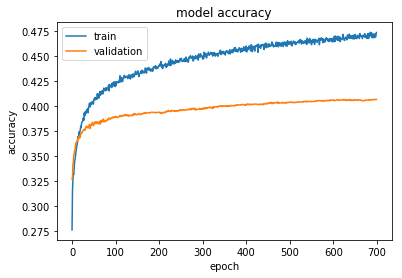

In [502]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [246]:
X_train.shape

(43999,)